In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
tf.random.set_seed(3)

In [2]:
import cv2
from PIL import Image

In [3]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

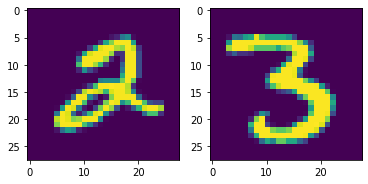

In [6]:
plt.subplot(1,2,1)
img = Image.fromarray(X_train[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_train[12])
plt.imshow(img)

Setting up the Layers of NN

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(40,activation='tanh'),
    keras.layers.Dense(60,activation='tanh'),
    keras.layers.Dense(80,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
                        ])

In [8]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [9]:
history = model.fit(X_train,Y_train,validation_split=0.25,epochs=50)

Epoch 1/50
1407/1407 [==============================] - 16s 9ms/step - loss: 0.7513 - accuracy: 0.7551 - val_loss: 0.5710 - val_accuracy: 0.8227
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5658 - accuracy: 0.8172 - val_loss: 0.5421 - val_accuracy: 0.8233
Epoch 3/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.5266 - accuracy: 0.8278 - val_loss: 0.4638 - val_accuracy: 0.8507
Epoch 4/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.4598 - accuracy: 0.8501 - val_loss: 0.3928 - val_accuracy: 0.8711
Epoch 5/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.4211 - accuracy: 0.8673 - val_loss: 0.3742 - val_accuracy: 0.8821
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.4119 - accuracy: 0.8681 - val_loss: 0.3938 - val_accuracy: 0.8735
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.4091 - accuracy: 0.8681 - val_loss: 0.4134 - val_accur

In [10]:
loss,metrics = model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2472 - accuracy: 0.9253


1 9


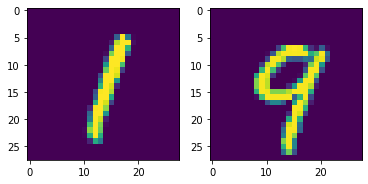

In [11]:
plt.subplot(1,2,1)
img = Image.fromarray(X_test[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_test[12])
plt.imshow(img)
print(Y_test[5],Y_test[12])

In [12]:
test_pred = model.predict(X_test)

In [13]:
Y_arg_max_list = [np.argmax(i) for i in test_pred]

In [14]:
Y_arg_max_list[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_arg_max_list)
print(cnf_matrix)

[[ 952    0    2    2    1    5    8    2    6    2]
 [   0 1110    8    2    0    2    5    2    6    0]
 [   8    4  978    5    4    5    9    7   10    2]
 [   3    5   25  914    1   26    2   15   15    4]
 [   1    1    3    2  886    4   12    6    3   64]
 [   8    1    3   14    6  819   15    6   14    6]
 [  12    2    1    2    9   12  915    1    3    1]
 [   2    8   28   23    8    1    0  927    5   26]
 [   7    2   16   22    9   17   26    3  859   13]
 [   4    8    1    5   41   14    1   21   21  893]]


Text(0.5, 69.0, 'Predicted Labels')

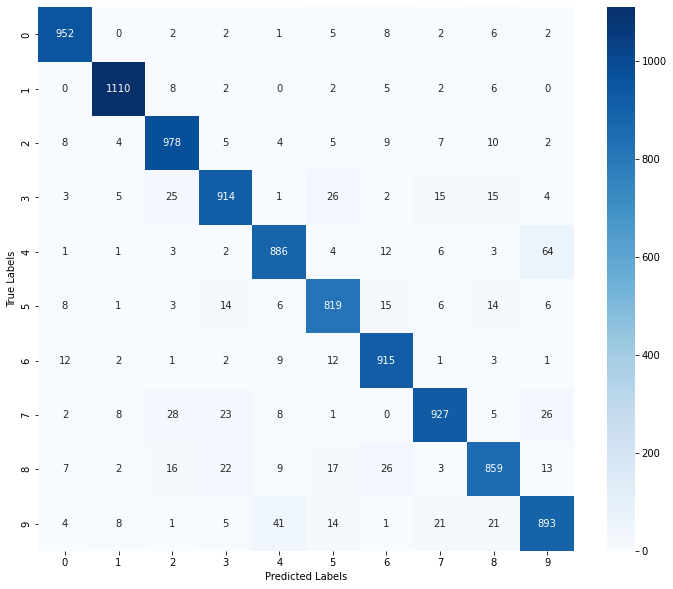

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(cnf_matrix,annot=True,cmap ='Blues',fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')